# Object Detection 

### Images Only

Images in 'Object/' Folder

(Model is saved as ObjDet.h5)


Load the model, and the Images and run the model on the images.

In [1]:
def no_warn():
    import warnings

    def fxn():
        warnings.warn("deprecated", DeprecationWarning)

    with warnings.catch_warnings(record=True) as w:
        # Cause all warnings to always be triggered.
        warnings.simplefilter("always")
        # Trigger a warning.
        fxn()
        # Verify some things
        assert len(w) == 1
        assert issubclass(w[-1].category, DeprecationWarning)
        assert "deprecated" in str(w[-1].message)


In [2]:
import os
import keras
from keras.models import load_model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
no_warn()


Using TensorFlow backend.


In [3]:

class Detect:
    
    def __init__(self, img_dir = ''):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = ResNet50(weights='RES_WET.h5')
    
    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 224, 224, 3))
        for i,img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir,img), target_size=(224, 224))
            self.batch_holder[i, :] = img
        return self.batch_holder
    
    def predict(self):
        fig = plt.figure(figsize=(25, 25))
        for i,img in enumerate(self.batch_holder):
              fig.add_subplot(9, 5, i+1)
              result=self.model.predict(self.batch_holder)
              plt.title( decode_predictions(result, top=1)[i])
              plt.tick_params(
                axis='both',        
                which='both',      
                bottom=False,      
                top=False,         
                labelbottom=False,
                labelleft=False)
              plt.imshow(img/256.)
        plt.show()

In [4]:
obj = Detect('Objects/')

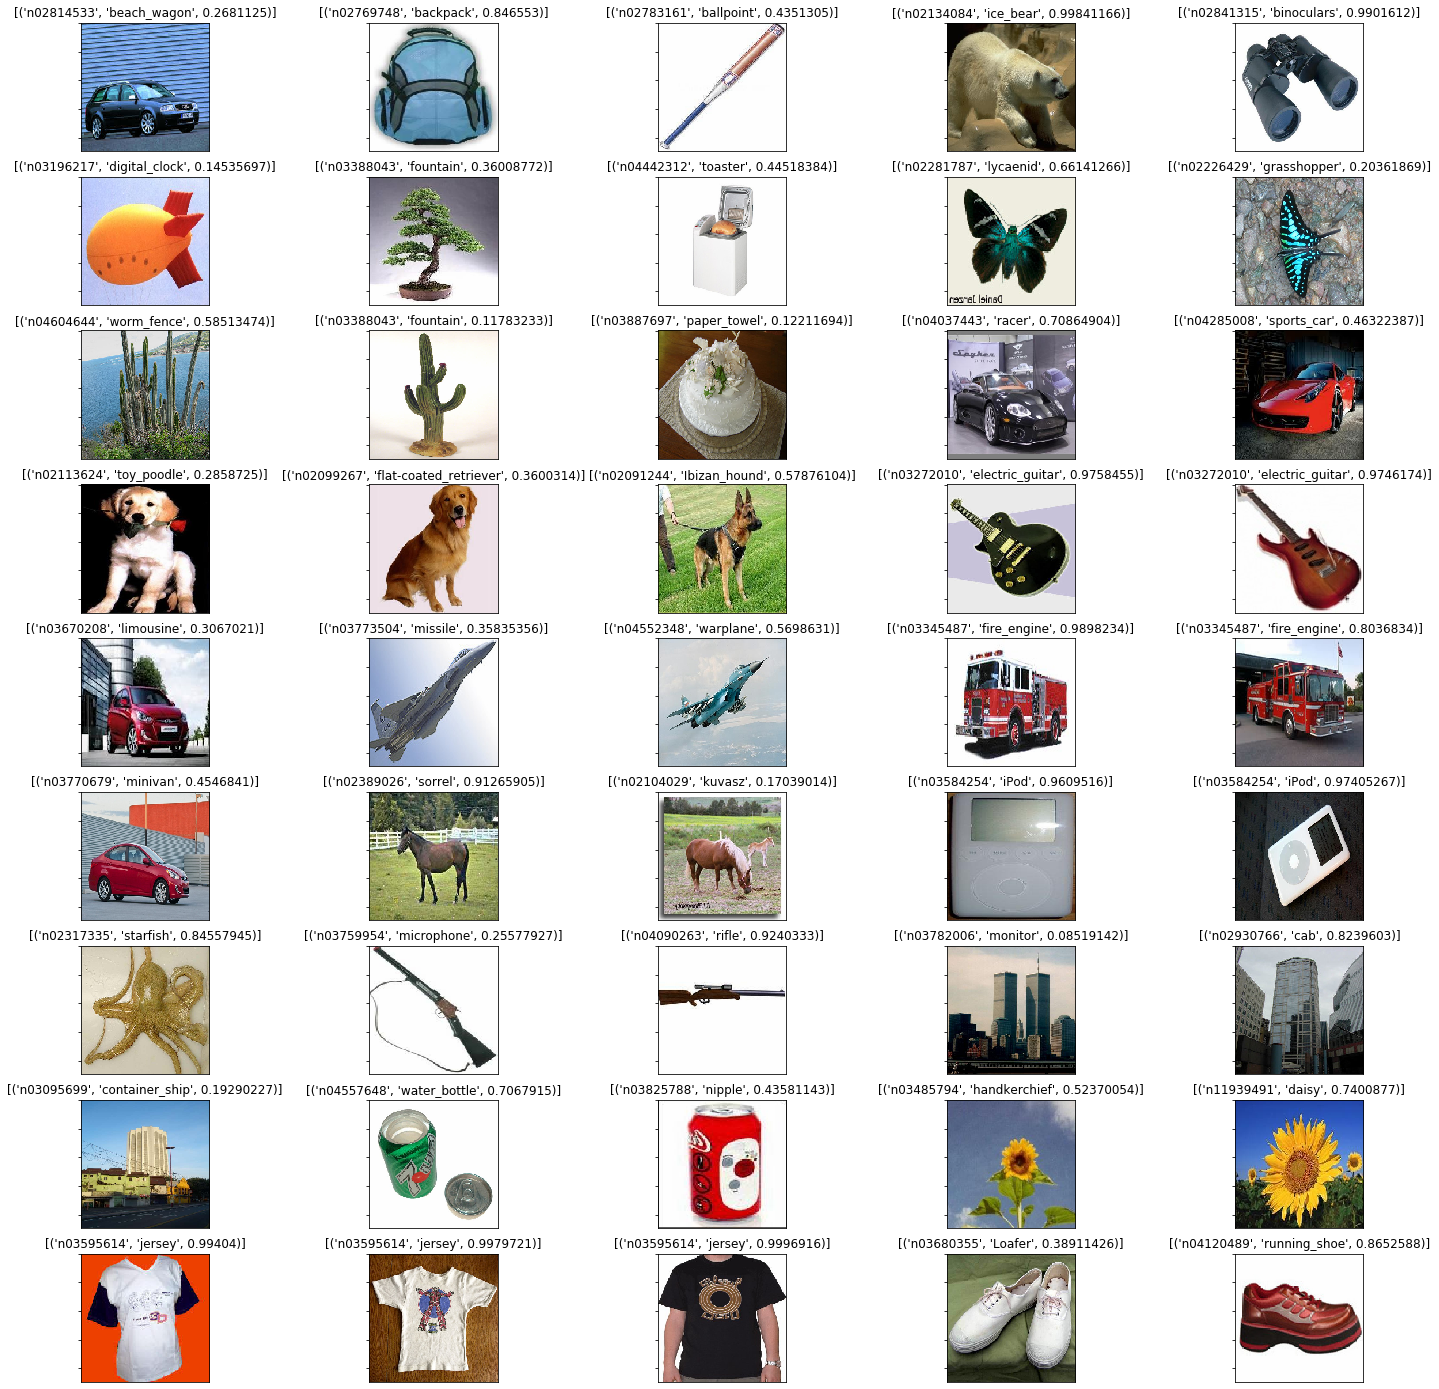

In [5]:
obj.read_images()
obj.predict()